In [1]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

# from thumbs.experiments.pokemjon_big_both import PokemonExperiment
from thumbs.experiments.pokemon_conditional_types import PokemonExperiment
from thumbs.train import load_weights
from thumbs.viz import show_samples, visualize_preprocessed_image
from thumbs.data import load_and_preprocess_image
import tensorflow as  tf
import numpy as np
import matplotlib.pyplot as plt



/home/anthony/workspace/yt-data


/home/anthony/workspace/yt-data/.venv/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 821 total files
Found 819 jpgs


  0%|          | 0/819 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

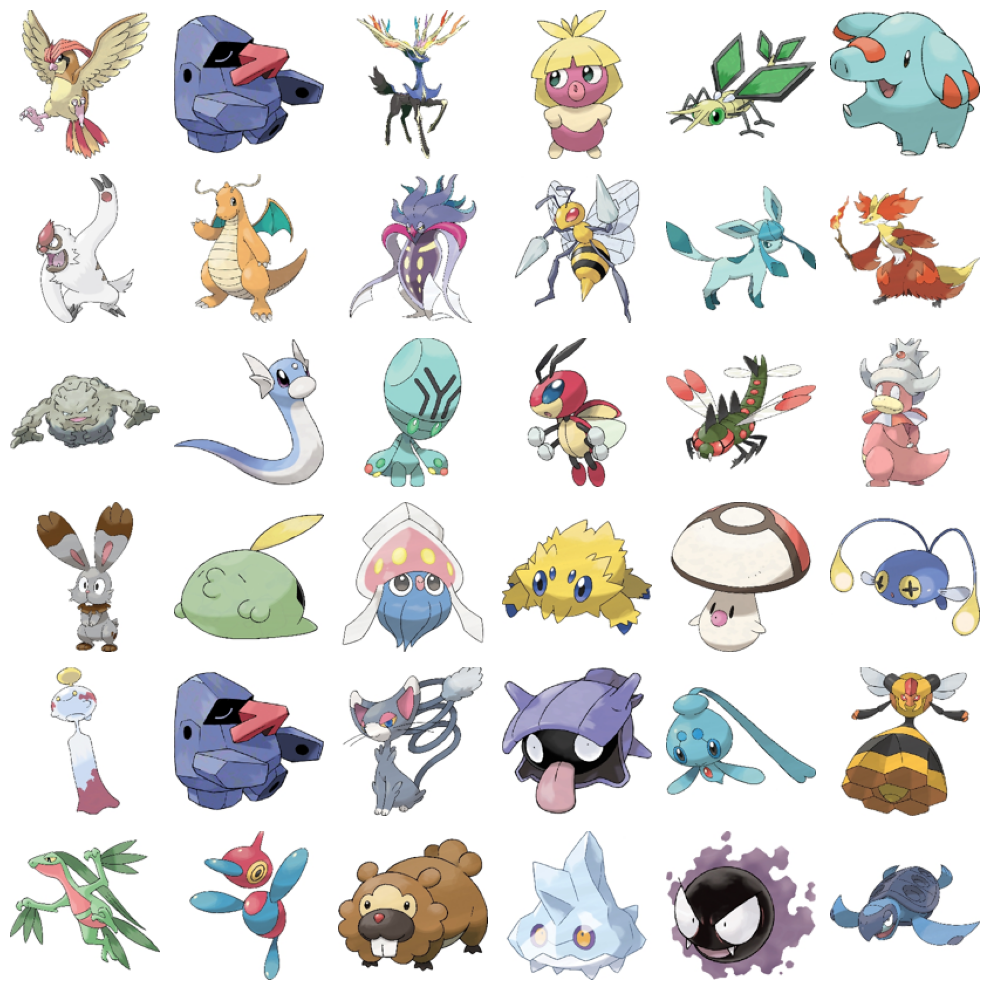

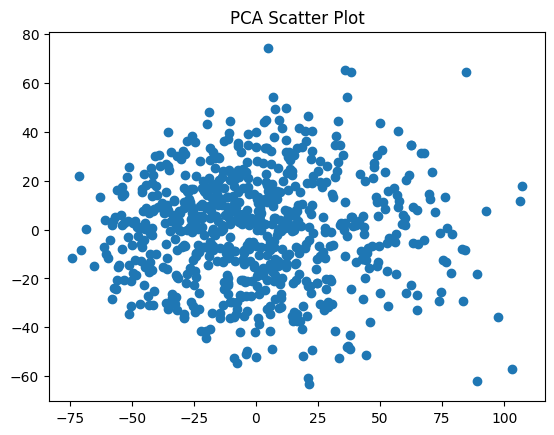

2023-07-14 13:43:08.090185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                     Output Shape                                Param #                 Connected to                                                      
 input_2 (InputLayer)                                             [(None, 19)]                                0                       []                                                                
                                                                                                                                                                                                        
 input_1 (InputLayer)                                             [(None, 128, 128, 3)]                       0                       []                                     

In [2]:
exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
load_weights(m.generator, f'{exp.get_params().weight_path}_gen')
load_weights(m.discriminator, f'{exp.get_params().weight_path}_dis')

In [3]:
import pandas as pd

pd.set_option('display.max_rows', None)
# Group all pokemon by type1, type2
exp.df['Type 2'] = exp.df['Type 2'].fillna('None')
grouped = exp.df.groupby(['Type 1', 'Type 2'])

# group_sizes = grouped.size()
group_sizes = grouped.size().reset_index(name='Size')
group_sizes = group_sizes.sort_values('Size', ascending=False)
total = group_sizes['Size'].sum()
print(total)
group_sizes 
# print(group_sizes )
# for (type1, type2), size in group_sizes.iteritems():
    # print(f'Type 1: {type1}, Type 2: {type2}, Size: {size}')


721


Type 1    Type 2  Size
88     Normal      None    60
138     Water      None    57
65      Grass      None    33
105   Psychic      None    32
44       Fire      None    28
31   Electric      None    26
85     Normal    Flying    23
38   Fighting      None    20
7         Bug      None    17
35      Fairy      None    15
97     Poison      None    15
66      Grass    Poison    14
74     Ground      None    13
3         Bug    Flying    13
81        Ice      None    12
8         Bug    Poison    11
26     Dragon      None    11
57      Ghost      None     9
115      Rock      None     9
18       Dark      None     9
136     Water    Ground     9
133     Water    Flying     7
41       Fire  Fighting     6
118      Rock     Water     6
126     Steel   Psychic     6
113      Rock    Ground     6
102   Psychic    Flying     6
5         Bug     Grass     6
42       Fire    Flying     5
99    Psychic     Fairy     5
15       Dark    Flying     5
10        Bug     Steel     5
23     Dragon    Flying     4
140     Water   Psychic     4
56      Ghost     Grass     4
141     Water      Rock     4
24     Dragon    Ground     4
84     Normal     Fairy     4
125     Steel      None     4
62      Grass    Flying     4
128     Water      Dark     4
123     Steel     Ghost     3
76     Ground      Rock     3
69     Ground      Dark     3
72     Ground    Flying     3
58      Ghost    Poison     3
80        Ice    Ground     3
59      Grass      Dark     3
61      Grass  Fighting     3
83        Ice     Water     3
54      Ghost      Fire     3
127     Steel      Rock     3
33   Electric     Steel     3
9         Bug      Rock     3
139     Water    Poison     3
12       Dark    Dragon     3
111      Rock    Flying     3
137     Water       Ice     3
29   Electric    Flying     3
135     Water     Grass     3
95     Poison    Flying     3
92     Poison      Dark     3
117      Rock     Steel     3
96     Poison    Ground     2
114      Rock       Ice     2
89     Normal   Psychic     2
82        Ice   Psychic     2
75     Ground   Psychic     2
112      Rock     Grass     2
116      Rock   Psychic     2
86     Normal     Grass     2
78        Ice    Flying     2
120     Steel     Fairy     2
106      Rock       Bug     2
94     Poison  Fighting     2
0         Bug  Electric     2
73     Ground     Ghost     2
43       Fire    Ground     2
2         Bug      Fire     2
13       Dark  Fighting     2
14       Dark      Fire     2
17       Dark       Ice     2
19       Dark   Psychic     2
20       Dark     Steel     2
27     Dragon   Psychic     2
134     Water     Ghost     2
32   Electric    Normal     2
34      Fairy    Flying     2
132     Water  Fighting     2
131     Water     Fairy     2
39   Fighting   Psychic     2
130     Water  Electric     2
45       Fire    Normal     2
129     Water    Dragon     2
50     Flying    Dragon     2
108      Rock    Dragon     2
55      Ghost    Flying     2
60      Grass     Fairy     2
64      Grass       Ice     2
67      Grass   Psychic     2
68      Grass     Steel     2
70     Ground    Dragon     2
109      Rock     Fairy     2
121     Steel  Fighting     1
124     Steel    Ground     1
122     Steel    Flying     1
110      Rock  Fighting     1
119     Steel    Dragon     1
71     Ground  Electric     1
107      Rock      Dark     1
28   Electric     Fairy     1
47       Fire      Rock     1
46       Fire   Psychic     1
40   Fighting     Steel     1
37   Fighting    Flying     1
36   Fighting      Dark     1
30   Electric     Ghost     1
25     Dragon       Ice     1
104   Psychic     Grass     1
22     Dragon      Fire     1
21     Dragon  Electric     1
16       Dark     Ghost     1
11        Bug     Water     1
6         Bug    Ground     1
4         Bug     Ghost     1
48       Fire     Steel     1
49       Fire     Water     1
51     Flying      None     1
52      Ghost      Dark     1
53      Ghost    Dragon     1
63      Grass    Ground     1
1         Bug  Fighting     1
77     Ground    

# Make a fake pokemon and judge it

In [4]:
exp.vocab

['bug',
 'dark',
 'dragon',
 'electric',
 'fairy',
 'fighting',
 'fire',
 'flying',
 'ghost',
 'grass',
 'ground',
 'ice',
 'normal',
 'poison',
 'psychic',
 'rock',
 'steel',
 'water']

<Figure size 640x480 with 0 Axes>

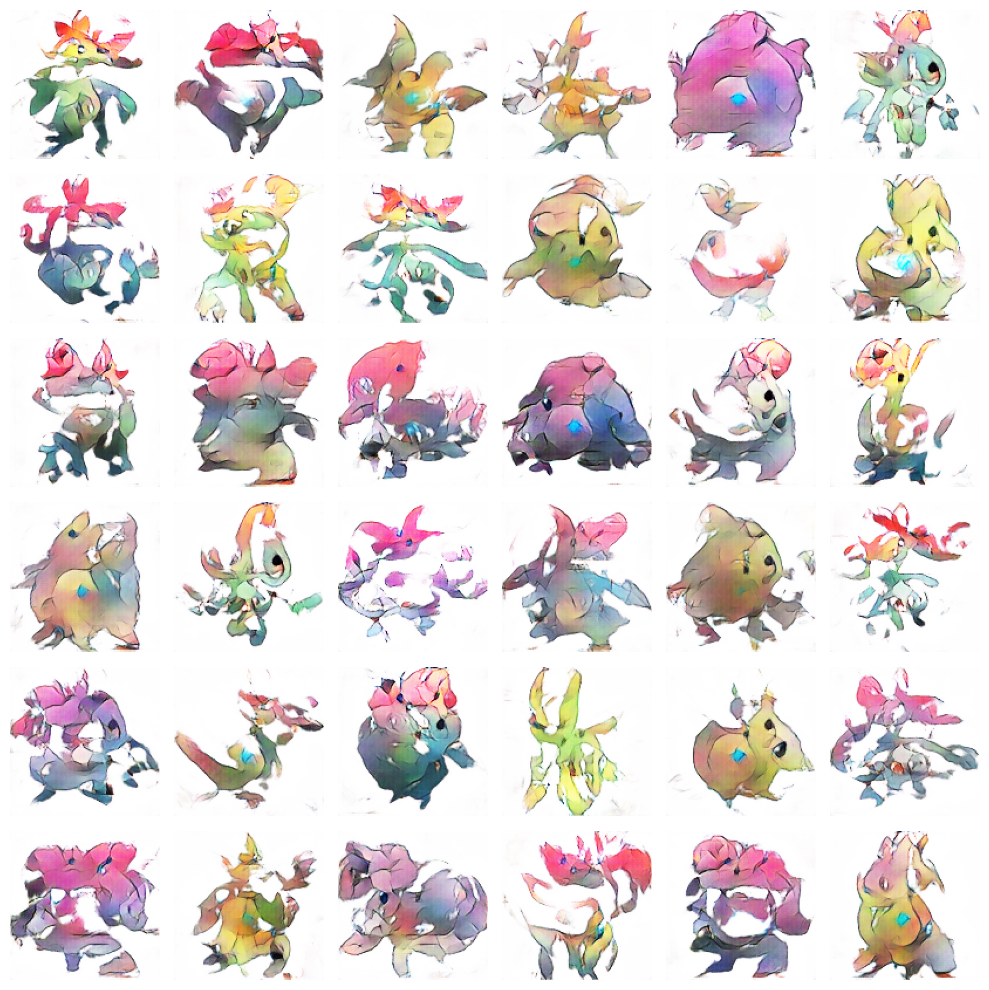

In [13]:

def get_labels(n: int):
    # get n random samples from self.labels
    normal_flying = exp.lookup(['ice', 'fire'])
    return np.array([normal_flying for _ in range(n)])


# show_samples(m.generator, exp.get_params().latent_dim, rows=6, cols=6, file_name="tmp.jpg", dir="/tmp", label_getter=exp.get_random_labels)
show_samples(m.generator, exp.get_params().latent_dim, rows=6, cols=6, file_name="tmp.jpg", dir="/tmp", label_getter=get_labels)

1/1 [==============================] - 0s 33ms/step


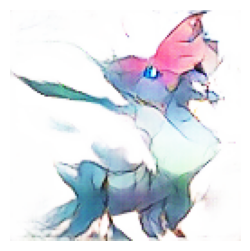

1/1 [==============================] - 0s 122ms/step
[[40.62247]]
1/1 [==============================] - 0s 23ms/step
[[47.94337]]


In [6]:
bug_label = np.expand_dims(np.array(exp.lookup(['bug'])), axis=0)
flying_ice_label = np.expand_dims(np.array(exp.lookup(['flying', 'ice'])), axis=0)
noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict([noise, flying_ice_label])
visualize_preprocessed_image(generated_thumbnails[0], (3,3))
print(m.discriminator.predict([generated_thumbnails, flying_ice_label]))
print(m.discriminator.predict([generated_thumbnails, bug_label])) # See if it can tell the difference between bug and flying/ice


# Determine attribution

In [7]:

# Define a function to compute the attribution maps using Gradient*Input method
def compute_attribution_map(image: np.ndarray):
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        output = m.discriminator(image)
    
    gradients = tape.gradient(output, image)
    attribution_map = gradients * image
    
    return attribution_map

def show_attribution(input_image):
    preprocessed_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

    # Compute the attribution map for the input image
    attribution_map = compute_attribution_map(preprocessed_image)
    # Convert the attribution map to a grayscale image
    attribution_map = np.mean(attribution_map, axis=-1, keepdims=True)

    # Normalize the attribution map to [0, 1]
    attribution_map -= np.min(attribution_map)
    attribution_map /= np.max(attribution_map)

    # Resize the attribution map to the original image size for visualization
    attribution_map = tf.image.resize(attribution_map, size=(128, 128)).numpy()


    # Convert them back to 0,255. The pokemon images look better that way, just keep
    # the attribution map consistent
    input_image = ((input_image + 1) * 127.5).astype(np.uint8)


    # Display the original image and the attribution map
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(input_image)
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    axes[1].imshow(attribution_map.squeeze(axis=0), cmap='bwr')
    axes[1].set_title('Attribution Map')
    axes[1].axis('off')
    plt.show()


In [8]:

show_attribution(generated_thumbnails[0])

ValueError: Layer "discriminator" expects 2 input(s), but it received 1 input tensors. Inputs received: [<tf.Tensor: shape=(1, 128, 128, 3), dtype=float32, numpy=
array([[[[0.93774956, 0.91528004, 0.9242926 ],
         [0.98770297, 0.98176205, 0.9827059 ],
         [0.9926631 , 0.9872944 , 0.9904306 ],
         ...,
         [0.9994281 , 0.99891925, 0.9989995 ],
         [0.9983724 , 0.99697256, 0.99755245],
         [0.98739886, 0.98170936, 0.98115724]],

        [[0.9815311 , 0.9795661 , 0.976099  ],
         [0.99724644, 0.99534214, 0.99686414],
         [0.9987992 , 0.99848425, 0.9982245 ],
         ...,
         [0.99997854, 0.9999519 , 0.9999684 ],
         [0.9998963 , 0.999835  , 0.99984354],
         [0.99875784, 0.99753284, 0.9984679 ]],

        [[0.986452  , 0.9839699 , 0.9863012 ],
         [0.9968299 , 0.9950745 , 0.9966266 ],
         [0.99855775, 0.9982048 , 0.99875945],
         ...,
         [0.99999374, 0.9999822 , 0.9999871 ],
         [0.99998623, 0.9999743 , 0.99997765],
         [0.99985456, 0.99967337, 0.9997406 ]],

        ...,

        [[0.9823838 , 0.97807336, 0.9800843 ],
         [0.9926908 , 0.99269706, 0.9923131 ],
         [0.99406946, 0.99207354, 0.9936593 ],
         ...,
         [0.9884321 , 0.97942275, 0.9746659 ],
         [0.98523784, 0.9747806 , 0.96588296],
         [0.95635337, 0.9234142 , 0.9182002 ]],

        [[0.96946514, 0.9662215 , 0.96869206],
         [0.98798054, 0.9841936 , 0.9869192 ],
         [0.99249816, 0.9908563 , 0.99208313],
         ...,
         [0.99333394, 0.98539484, 0.9842572 ],
         [0.98637444, 0.9742985 , 0.9606727 ],
         [0.9654819 , 0.93525153, 0.9198029 ]],

        [[0.92379975, 0.92125475, 0.925194  ],
         [0.9624892 , 0.96478176, 0.9610579 ],
         [0.9770181 , 0.97328174, 0.97320074],
         ...,
         [0.98503554, 0.9716908 , 0.96814084],
         [0.96507215, 0.9358912 , 0.9283705 ],
         [0.91868764, 0.86748415, 0.8219442 ]]]], dtype=float32)>]

### Sanity check against an absurd image

1/1 [==============================] - 0s 26ms/step
[[-13.387986]]


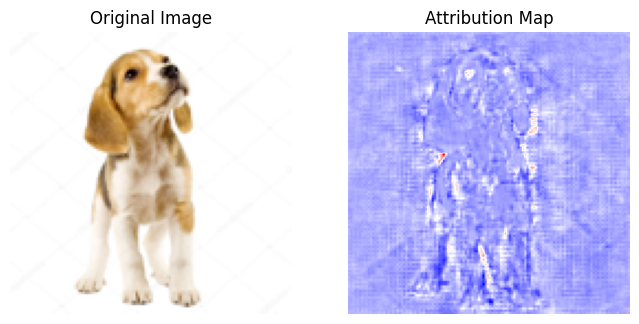

In [ ]:
# load 
egg_jpg = '/home/anthony/windows/Downloads/dog_white.jpg'
egg = load_and_preprocess_image(egg_jpg, (128, 128, 3))

print(m.discriminator.predict(np.expand_dims(egg, axis=0)))
show_attribution(egg)

# Judge a real pokemon

In [ ]:
from thumbs.data import get_pokemon_data256
images = get_pokemon_data256(exp.get_params().img_shape)
images.shape

ModuleNotFoundError: No module named 'thumbs'

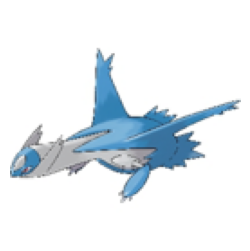

1/1 [==============================] - 0s 25ms/step
[[-5.0586567]]


In [ ]:
real_pokemon = images[np.random.randint(0, images.shape[0], 1)]
visualize_preprocessed_image(real_pokemon[0], (3,3))

print(m.discriminator.predict(real_pokemon))



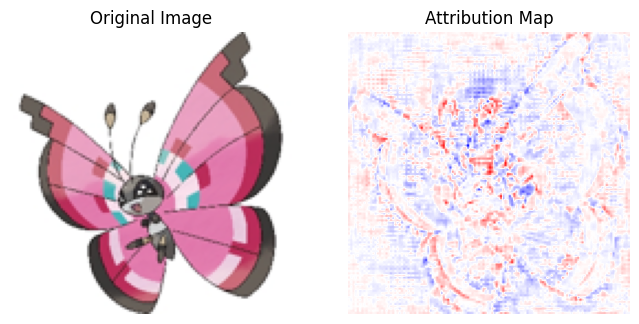

In [ ]:

show_attribution(real_pokemon[0])

In [ ]:

# Mean of the entire real set
print(np.mean(m.discriminator.predict(images)))

26/26 [==============================] - 2s 64ms/step
3.6592631


# Inspect hidden layer output

Layer 1 of 6, shape (None, 6, 6, 256), name conv2d_transpose/BiasAdd:0


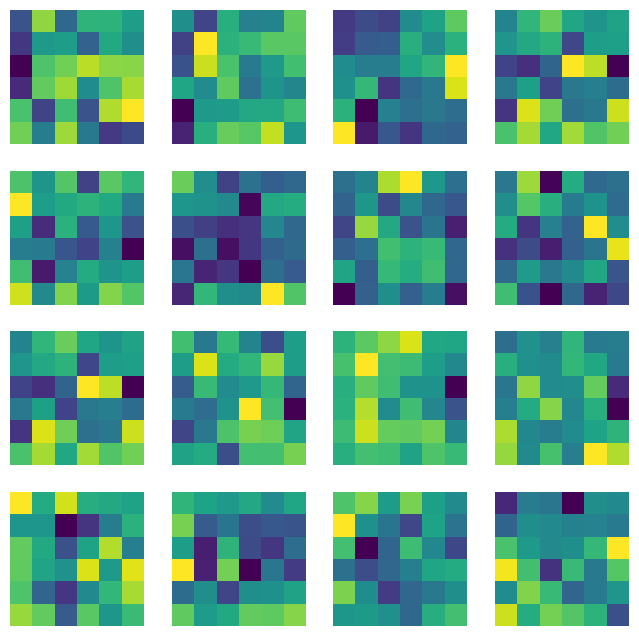

Layer 2 of 6, shape (None, 30, 30, 192), name conv2d_transpose_1/BiasAdd:0


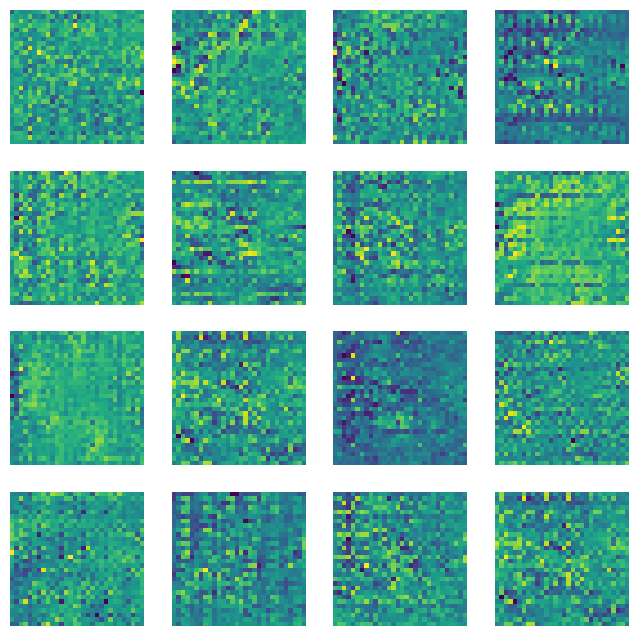

Layer 3 of 6, shape (None, 63, 63, 128), name conv2d_transpose_2/BiasAdd:0


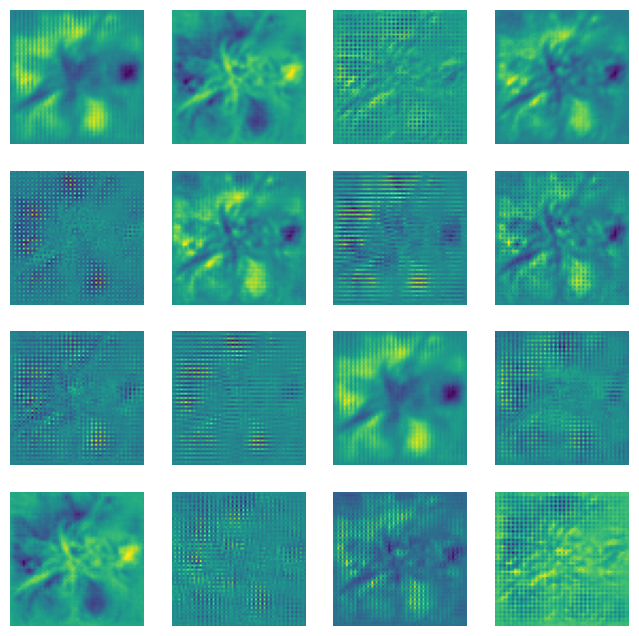

Layer 4 of 6, shape (None, 64, 64, 64), name conv2d_transpose_3/BiasAdd:0


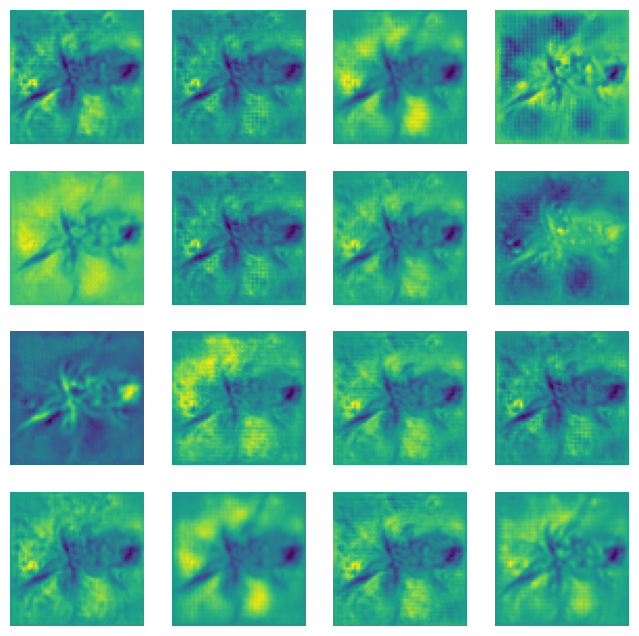

Layer 5 of 6, shape (None, 128, 128, 3), name conv2d_transpose_4/BiasAdd:0


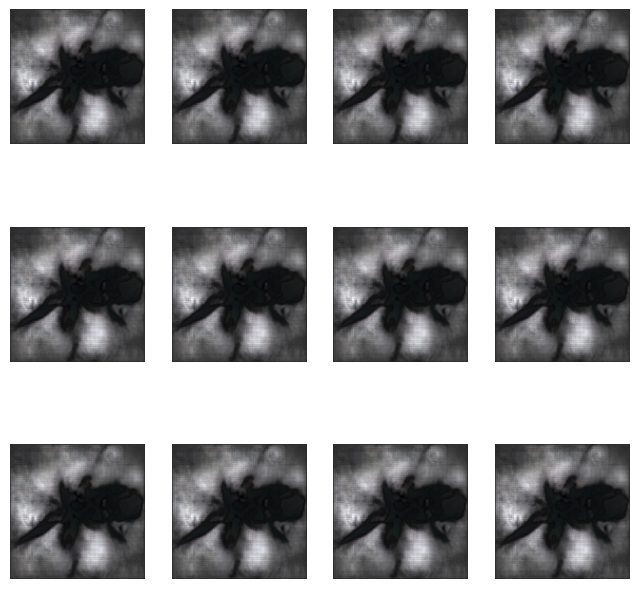

Layer 6 of 6, shape (None, 128, 128, 3), name activation/Tanh:0


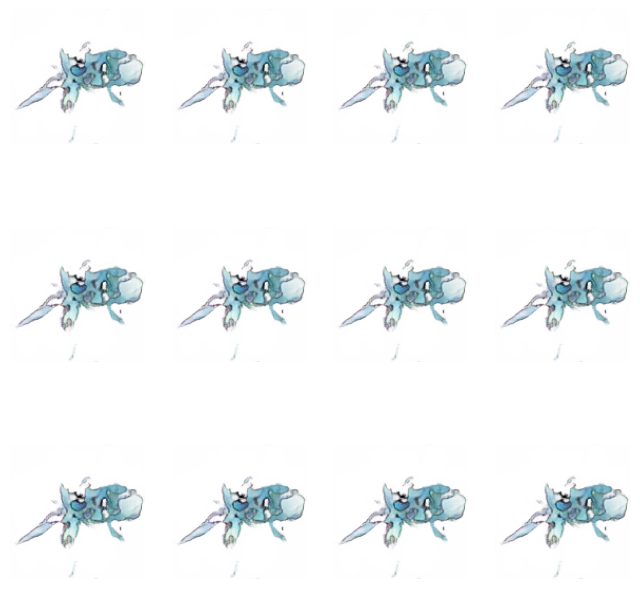

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

def get_intermediate_models(model):
    intermediate_models = []
    # layers_to_get = [2,5,8,11, 12]
    for i in range(len(model.layers)):
        # only pick models that have conv2d_transpose_1 or tanh in the name
        if 'conv2d_transpose' in model.layers[i].output.name.lower() or 'tanh' in model.layers[i].output.name.lower():
            print(model.layers[i])
            intermediate_model = Model(inputs=model.input, outputs=model.layers[i].output)
            intermediate_models.append(intermediate_model)
    return intermediate_models


generator = m.generator
intermediate_models = get_intermediate_models(generator)
noise = np.random.normal(0, 1, (1, 100))
for i, intermediate_model in enumerate(intermediate_models):
    print(f'Layer {i+1} of {len(intermediate_models)}, shape {intermediate_model.output_shape}, name {intermediate_model.output.name}')
    intermediate_output = intermediate_model.predict(noise, verbose=0)

    intermediate_output = intermediate_output[0]
    # n = 64
    # intermediate_output = intermediate_output[:, :, :n]

    intermediate_output -= intermediate_output.min() # Make the minimum 0
    intermediate_output /= intermediate_output.max() # Make the maximum 1

    n_cols = 4
    n_channels = min(n_cols, intermediate_output.shape[2])
    fig, axs = plt.subplots(n_channels , n_cols, figsize=(8, 8))
    for i in range(n_channels):
        for j in range(n_cols):
            if n_channels == 3:
                axs[i][j].imshow(intermediate_output)
            else:
                axs[i][j].imshow(intermediate_output[:, :, np.random.randint(0, intermediate_output.shape[2])])
            axs[i][j].axis('off')

    plt.show()

